## Mackey-Glass equation - 1D example

In [1]:
using CairoMakie
using LinearAlgebra
include("mackeyglassfunc.jl") #system of Mackey-Glass equation
include("mackeytau.jl") #Delay forumla for Mackey-Glass equation
include("f_deriv.jl") #used to find state and/or parameter derivatives
include("jacobian_new.jl") #Jacobian function
include("newton_new.jl") #Newton function
include("F_eq.jl") #Initialisates a function to find equilibria 
include("track_curve_new.jl") #Tracking curve function (used for continuation and equilibria branches)
include("stab_func.jl") #finds stability and eigenvalues (and eigenvector and ω is interested in Hopf bifurcation)

stab_func (generic function with 1 method)

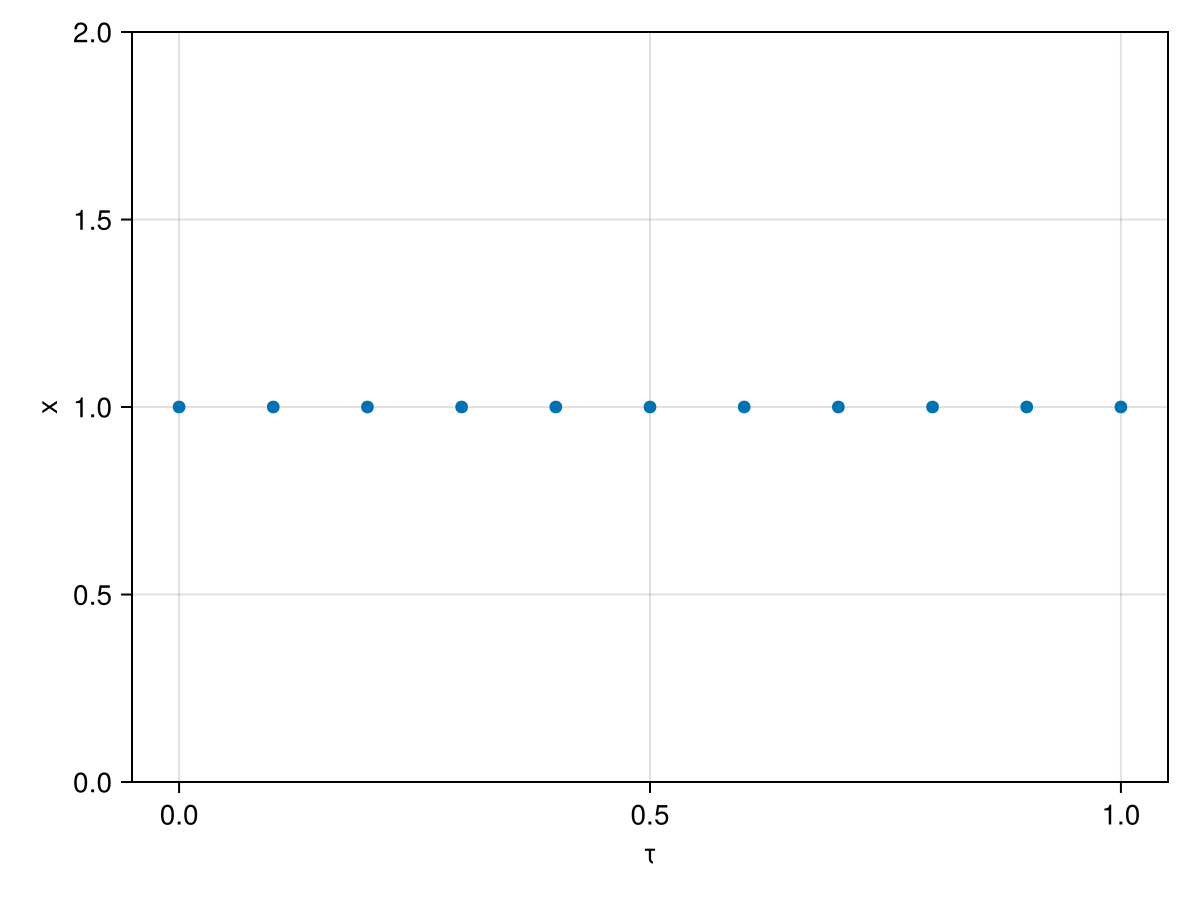

In [113]:
gamma=1.0
#initial states for following parameters (obtained from DDE-Biftool example)
beta=2
n=10
tau=0
x0=(beta-1)^(1/n) #obtained from DDE-Biftool demo
nd=1 #one delay

y01,feq=F_eq(mackeyglassfunc,x0, [gamma,beta,n,tau],nd, par_indx=4)#par_indx=2)

ylist1,ytan1=track_curve_new(feq,y01,[0.0,1],stepsize=0.1,nmax=10) #i think it should output 1's for x value
#ylist1,ytan1=track_curve_new(feq,y01,[0.0,1],nmax=150) #i think it should output 1's for x value
#ylist2,ytan2=track_curve_new(feq,y01,[0,0],nmax=150) #i think it should output 1's for x value


fig1=Figure()
ax1=Axis(fig1[1,1],xlabel="τ",ylabel="x")
scatter!(ax1,[u[2] for u in ylist1],[u[1] for u in ylist1])
#scatter!(ax1,[u[2] for u in ylist2],[u[1] for u in ylist2])

#xlims!(ax1,[0.0,5])
fig1

# Stability

In [114]:
#stability of initial point
stab_func(mackeyglassfunc,mackeytau, [x0], [0.4],[gamma,beta,n,tau], [4], nd, doprint=1)

(0, ComplexF64[-490.57574919789795 - 7.523319036746341im, -490.57574919789795 + 7.523319036746341im, -489.63791830741775 - 22.54077603603508im, -489.63791830741775 + 22.54077603603508im, -487.76588020648524 - 37.47080256001754im, -487.76588020648524 + 37.47080256001754im, -484.9668681995335 - 52.25548701208614im, -484.9668681995335 + 52.25548701208614im, -481.25169715799376 - 66.83747934686271im, -481.25169715799376 + 66.83747934686271im  …  -15.396706766297207 + 71.6993031971682im, -10.81600842307932 - 57.03518929879945im, -10.81600842307932 + 57.03518929879945im, -6.9743281287934655 - 42.120443392874975im, -6.9743281287934655 + 42.120443392874975im, -3.7216238533277233 - 27.030841904445303im, -3.7216238533277233 + 27.030841904445303im, -0.5406924530760806 - 12.065155354958145im, -0.5406924530760806 + 12.065155354958145im, 2.337406191427087 + 0.0im], ComplexF64[0.006085853353154024 - 9.371283053204109e-5im 0.006085853353154024 + 9.371283053204109e-5im … -0.011357579466617362 + 0.09390

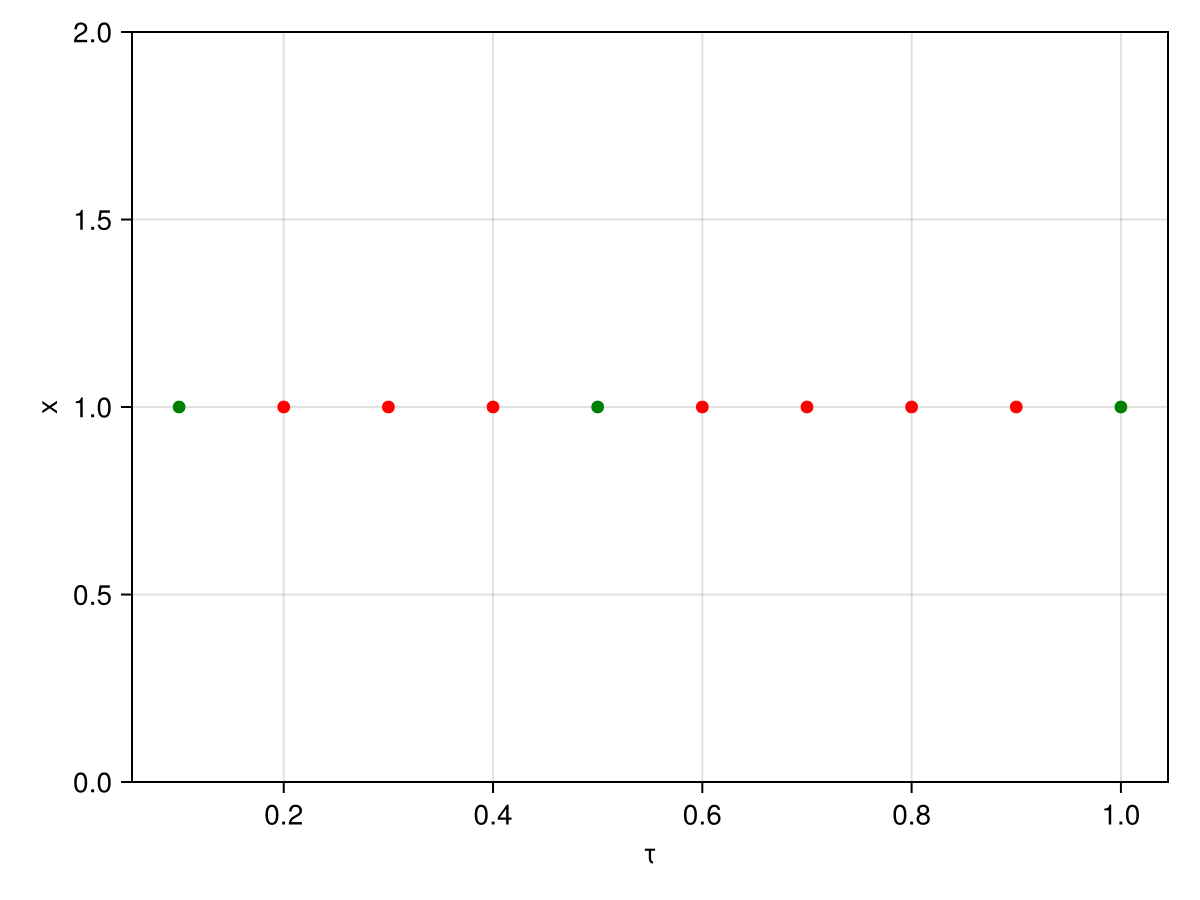

In [118]:
xmat1=hcat([u[1] for u in ylist1])
xlist1=[xmat1[i,:] for i in 1:size(xmat1,1)]

plist1=[u[2] for u in ylist1]

m=100 #number of discretised steps
n=1 #number of states 
neq=length(plist1) #number of equilibrium points we're finding the stability of
stab=fill(NaN,neq)
#eigvals1=[fill(0.0+0.0*im,n*(1+nd*m)) for _ in 1:neq]

#for i in 1:neq
for i in 2:neq
    #stab[i],eigvals1[i],=stab_func(mackeyglassfunc,mackeytau,xlist1[i],[plist1[i]],[gamma,beta,n,tau],[4],nd,doprint=1,m=m)
    stab[i]=stab_func(mackeyglassfunc,mackeytau,xlist1[i],[plist1[i]],[gamma,beta,n,tau],[4],nd,doprint=0,m=m)[1]
end
#stab
stable=(stab.==1.0)
unstable=(stab.==0.0)

fig2=Figure()
ax2=Axis(fig2[1,1],xlabel="τ",ylabel="x")
scatter!(ax2,plist1[stable],[u[1] for u in xlist1[stable]], color="green")
scatter!(ax2,plist1[unstable],[u[1] for u in xlist1[unstable]], color="red")
#xlims!(ax2,[0.0,0.6])
fig2


In [123]:
#hopf_indx=findlast(isequal(0.0), stab)
hopf_indx=findfirst(isequal(1.0), stab[3:end])
p_hopf_est=plist1[hopf_indx+2]

0.5

In [124]:
include("create_hopffunc.jl")
yh01,fhopf=create_hopffunc(mackeyglassfunc,mackeytau,[gamma,beta,n,tau],xlist1[hopf_indx],[plist1[hopf_indx]],[4],nd)
#yh01,fhopf=create_hopffunc(mackeyglassfunc,mackeytau,[gamma,beta,n,tau],xlist1[hopf_indx],[0.55],[4],nd)
println("The initial guess for Hopf info: $yh01")
yh1,conv1,=newton_new(fhopf,yh01)
println("The true information for the Hopf bifurcation: $yh1")
println("converged?: $conv1")
a_hopf=yh1[end]
om_hopf=yh1[end-1]
x_hopf=yh1[1]
println("The a value for hopf bifurcation: $a_hopf")
println("The ω value for hopf bifurcation: $om_hopf")

The initial guess for Hopf info: [1.0, -1.0, -0.0, 0.0, 0.30000000000000004]


SingularException: SingularException(1)